In [32]:
#this is the first part of the coursework, where I will be building a linear regression model to 
# predict the median house values in Calefornia districts; as well as exploring relationships between household income and house 
# prices, and evaluating the model's performances

In [33]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [34]:
calefornia_datasets = fetch_california_housing()
calefornia_datasets

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [35]:
calefornia_datasets = fetch_california_housing(as_frame=True)
df = calefornia_datasets.frame

MedInc = df['MedInc'] #Median Income (the features)
MedHouseVal = df['MedHouseVal'] #Median House Value (the target)


#SPLITTING THE DATA INTO TRAINING AND TESTING SETS
X = MedInc.values
y = MedHouseVal.values

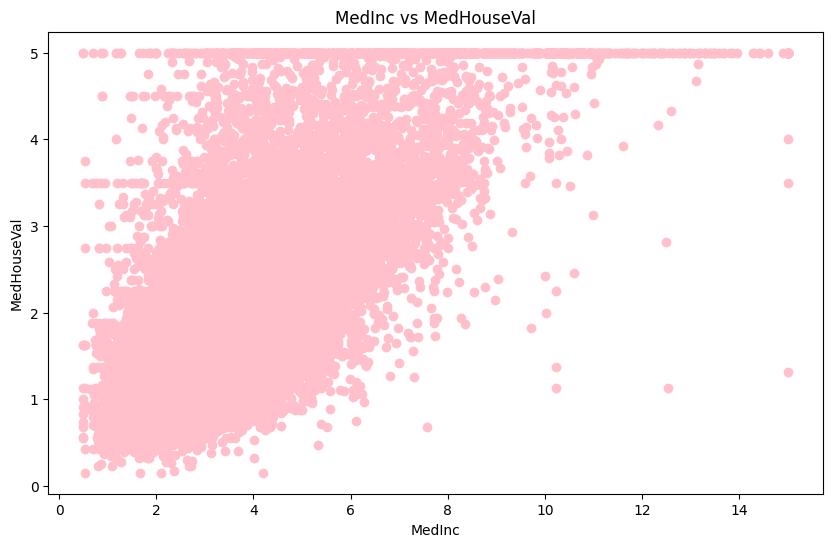

In [36]:
#PLOTTING THE DATA
plt.figure(figsize=(10, 6))
plt.scatter(X,y, c='pink')
plt.title("MedInc vs MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

In [37]:
#CALCULATING SUMMARY STATISTICS FOR BOTH VARIABLES 
summary_statistics_MedInc = df["MedInc"].describe()
print("MedInc Summary Statistics \n",summary_statistics_MedInc)

print() 

summary_statistics_MedHouseVal = df["MedHouseVal"].describe()
print("MedHouseVal Summary Statistics \n",summary_statistics_MedHouseVal)


MedInc Summary Statistics 
 count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

MedHouseVal Summary Statistics 
 count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


In [38]:
#SPLITTING THE DATA INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#STANDARDSING THE DATA USING STANDARD SCALER
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).flatten()



In [39]:
#LINEAR REGRESSION MODEL
model = LinearRegression()
#model.fit(X_train_scaled, y_train)

In [40]:
#GRADIENT DESCENT 
''''
FORMULA = theta = theta - alpha *(1/m)* sum((h(x) - y) * x)
x values is the MedInc
y values is the MedHouseVal
alpha is the learning rate
m is the number of observations
'''
theta0i = 0
theta1i = 0
alpha = 0.01 #our learning rate
m = len(X_train_scaled)

for i in range(1000):
    h_theta = theta0i + theta1i * X_train_scaled
    error = h_theta - y_train

    theta0i -= alpha * (1/m) * np.sum(error)
    theta1i -= alpha * (1/m) * np.sum(error * X_train_scaled)
print("h_theta=", theta0i, "+", theta1i, "x")


h_theta= 2.071857488845021 + 0.7984850913403571 x


In [50]:
#PREDICTING THE MEDIAN HOUSE VALUE
y_pred = theta0i + theta1i * X_test_scaled
#PREDICT THE HOUSE VALUE WITH MEDIAN INCOME OF $80,000 (MedInc = 8)
y_pred_80 = theta0i + theta1i * 8
print(f"Predicted House Value with Median Income of $80,000: {y_pred_80:.7f}")


Predicted House Value with Median Income of $80,000: 8.4597382


In [42]:
#EVALUATING THE MODEL
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.5f}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.5f}")

Mean Absolute Error: 0.62989
Mean Squared Error: 0.70912
R2 Score: 0.45886


In [43]:
#STOCHASTIC GRADIENT DESCENT
s_theta0i = 0
s_theta1i = 0
alpha = 0.01
m = len(X_train_scaled)

for i in range(1000):
    for j in range(m):
        s_h_theta = s_theta0i + s_theta1i * X_train_scaled[j]
        s_error = s_h_theta - y_train[j]

        s_theta0i -= alpha * s_error
        s_theta1i -= alpha * s_error * X_train_scaled[j]
print("h_theta=", s_theta0i, "+", s_theta1i, "x")

h_theta= 2.1209505895984813 + 0.7803211969604724 x


In [53]:
#PREDICTING THE MEDIAN HOUSE VALUE (STOCHASTIC GRADIENT DESCENT)
s_y_pred = s_theta0i + s_theta1i * X_test_scaled
#PREDICT THE HOUSE VALUE WITH MEDIAN INCOME OF $80,000 (MedInc = 8)
s_y_pred_80 = s_theta0i + s_theta1i * 8
print(f"Predicted House Value with Median Income of $80,000: {s_y_pred_80:.7f}")

Predicted House Value with Median Income of $80,000: 8.3635202


In [45]:
#EVALUATING THE MODEL (STOCHASTIC GRADIENT DESCENT)
s_mae = mean_absolute_error(y_test, s_y_pred)
print(f"Mean Absolute Error: {s_mae:.5f}")

s_mse = mean_squared_error(y_test, s_y_pred)
print(f"Mean Squared Error: {s_mse:.5f}")

s_r2 = r2_score(y_test, s_y_pred)
print(f"R2 Score: {s_r2:.5f}")


Mean Absolute Error: 0.64186
Mean Squared Error: 0.71099
R2 Score: 0.45743


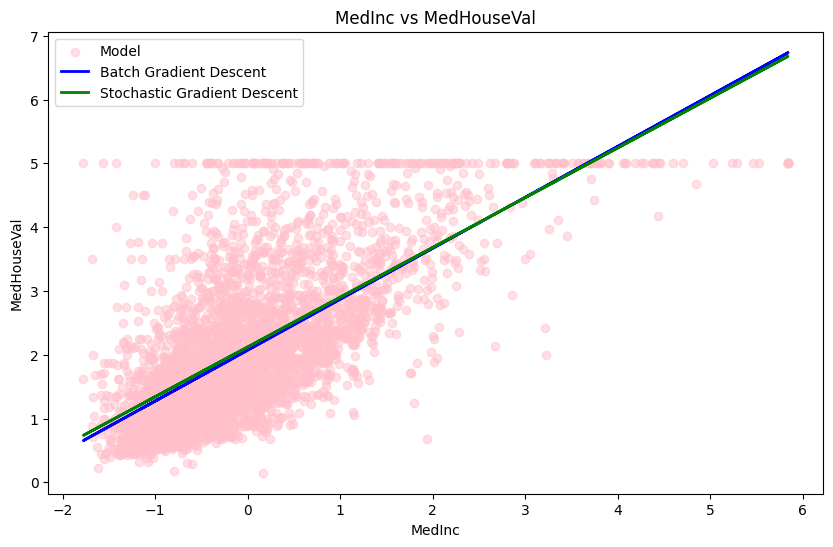

In [46]:
#PLOTTING THE LINEAR REGRESSION MODEL
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test, alpha=0.5, c='pink')
plt.plot(X_test_scaled, y_pred,linewidth = 2, c='blue')
plt.plot(X_test_scaled, s_y_pred,linewidth = 2, c='green')
plt.title("MedInc vs MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.legend(["Model", "Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

<Axes: >

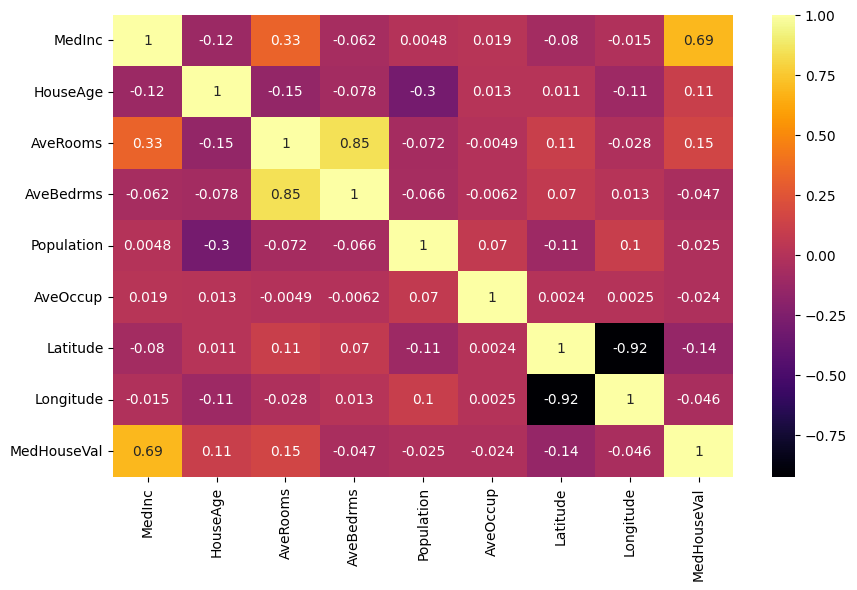

In [47]:
#CALCULATING THE CORRELATION BETWEEN THE FEATURES AND THE TARGET
correlation = df.corr()
correlation['MedHouseVal'].sort_values(ascending=False)
#plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap="inferno", annot=True)


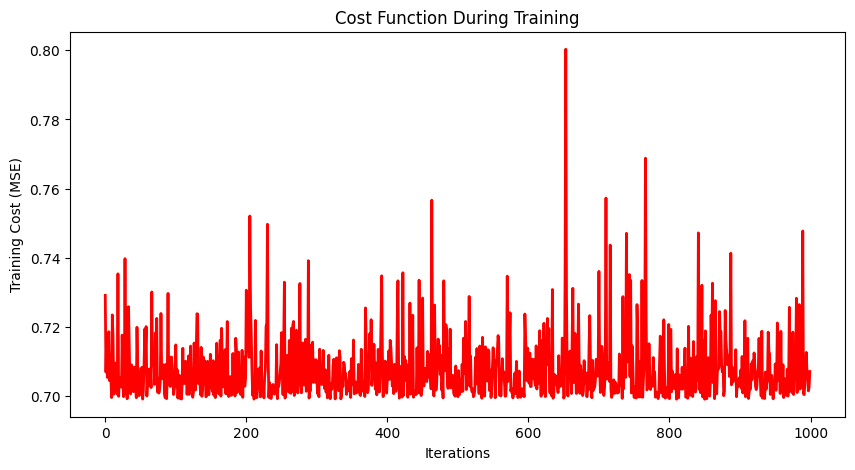

In [58]:
# Reinitialize parameters
s_theta0i = 0
s_theta1i = 0
alpha = 0.01
m = len(X_train_scaled)
iterations = 1000
cost_history = []  # Changed from mse_history to cost_history

# SGD implementation
for i in range(iterations):
    # Shuffle data each iteration
    indices = np.random.permutation(m)
    X_shuffled = X_train_scaled[indices]
    y_shuffled = y_train[indices]
    
    for j in range(m):
        prediction = s_theta0i + s_theta1i * X_shuffled[j]
        error = prediction - y_shuffled[j]
        
        s_theta0i -= alpha * error
        s_theta1i -= alpha * error * X_shuffled[j]
    
    # Calculate current cost (MSE)
    current_cost = mean_squared_error(y_train, s_theta0i + s_theta1i * X_train_scaled)
    cost_history.append(current_cost)

# Plotting with improved labels
plt.figure(figsize=(10, 5))
plt.plot(cost_history, c='red', linewidth=2)
plt.title("Cost Function During Training")
plt.xlabel("Iterations")
plt.ylabel("Training Cost (MSE)")
plt.show()